In [ ]:
from scipy.io import arff
import urllib.request
import io

url = "http://www.ece.uah.edu/~thm0009/icsdatasets/gas_final.arff"
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df['result'] = df['result'].apply(lambda x: int(x.decode('utf-8')))
df

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,rate,setpoint,control_mode,control_scheme,pump,solenoid,crc_rate,measurement,time,result
0,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.528736,1.106868,0
1,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.043098,0
2,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.266332,0
3,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.116280,0
4,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.528736,1.257916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97014,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.252874,1.288076,0
97015,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.275862,1.126445,0
97016,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.264368,1.251281,0
97017,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.287356,1.103920,0


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
column_names = df.columns.tolist()

print(column_names)

['command_address', 'response_address', 'command_memory', 'response_memory', 'command_memory_count', 'response_memory_count', 'comm_read_function', 'comm_write_fun', 'resp_read_fun', 'resp_write_fun', 'sub_function', 'command_length', 'resp_length', 'gain', 'reset', 'deadband', 'cycletime', 'rate', 'setpoint', 'control_mode', 'control_scheme', 'pump', 'solenoid', 'crc_rate', 'measurement', 'time', 'result']


In [ ]:
target = "result"

int_columns = ['command_address', 'response_address', 'command_memory', 'response_memory', 'command_memory_count', 'response_memory_count', 'comm_read_function', 'comm_write_fun', 'resp_read_fun', 'resp_write_fun', 'sub_function', 'command_length', 'resp_length', 'gain', 'reset', 'deadband', 'cycletime', 'rate', 'setpoint', 'control_mode', 'control_scheme', 'pump', 'solenoid', 'crc_rate', 'measurement', 'time']
bool_columns = []

feature_columns = (int_columns + bool_columns + [target])

In [ ]:
from sklearn.model_selection import train_test_split
train = df
n_total = len(train)

train_val_indices, test_indices = train_test_split(
    range(n_total), test_size=0.2, random_state=0)
train_indices, valid_indices = train_test_split(
    train_val_indices, test_size=0.2 / 0.6, random_state=0)


In [ ]:
categorical_columns = []
categorical_dims =  {}
for col in train.columns[train.dtypes == object]:
  print(col, train[col].nunique())
  l_enc = LabelEncoder()
  train[col] = train[col].fillna("VV_likely")
  train[col] = l_enc.fit_transform(train[col].values)
  categorical_columns.append(col)
  categorical_dims[col] = len(l_enc.classes_)

for col in train.columns[train.dtypes == 'float64']:
  train.fillna(train.loc[train_indices, col].mean(), inplace=True)

In [ ]:
unused_feat = []

features = [ col for col in train.columns if col not in unused_feat+[target]]

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]


In [ ]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.2 MB/s eta 0:00:00


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
np.random.seed(0)


import os
# import wget
from pathlib import Path

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
clf = TabNetClassifier(
  n_d=64, n_a=64, n_steps=5,
  gamma=1.5, n_independent=2, n_shared=2,
  cat_idxs=cat_idxs,
  cat_dims=cat_dims,
  cat_emb_dim=1,
  lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
  optimizer_fn=torch.optim.Adam,
  optimizer_params=dict(lr=2e-2),
  scheduler_params = {"gamma": 0.95, "step_size": 20},
  scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
if os.getenv("CI", False):
# Take only a subsample to run CI
    X_train = train[features].values[train_indices][:1000,:]
    y_train = train[target].values[train_indices][:1000]
else:
    X_train = train[features].values[train_indices]
    y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

In [ ]:
max_epochs = 100

In [ ]:
from pytorch_tabnet.augmentations import ClassificationSMOTE
aug = ClassificationSMOTE(p=0.2)

clf.fit(
  X_train=X_train, y_train=y_train,
  eval_set=[(X_train, y_train), (X_valid, y_valid)],
  eval_name=['train', 'valid'],
  max_epochs=max_epochs
)

epoch 0  | loss: 0.79866 | train_accuracy: 0.23174 | valid_accuracy: 0.23203 |  0:00:44s
epoch 1  | loss: 0.22496 | train_accuracy: 0.67812 | valid_accuracy: 0.67818 |  0:01:02s
epoch 2  | loss: 0.2028  | train_accuracy: 0.70576 | valid_accuracy: 0.70826 |  0:01:19s
epoch 3  | loss: 0.19793 | train_accuracy: 0.70871 | valid_accuracy: 0.71146 |  0:01:36s
epoch 4  | loss: 0.19313 | train_accuracy: 0.72535 | valid_accuracy: 0.72662 |  0:01:53s
epoch 5  | loss: 0.18807 | train_accuracy: 0.6522  | valid_accuracy: 0.65302 |  0:02:11s
epoch 6  | loss: 0.18859 | train_accuracy: 0.84408 | valid_accuracy: 0.84381 |  0:02:28s
epoch 7  | loss: 0.18361 | train_accuracy: 0.73111 | valid_accuracy: 0.73404 |  0:02:45s
epoch 8  | loss: 0.19414 | train_accuracy: 0.77408 | valid_accuracy: 0.77798 |  0:03:02s
epoch 9  | loss: 0.18626 | train_accuracy: 0.75767 | valid_accuracy: 0.75877 |  0:03:19s
epoch 10 | loss: 0.1838  | train_accuracy: 0.55248 | valid_accuracy: 0.55261 |  0:03:37s
epoch 11 | loss: 0.18

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


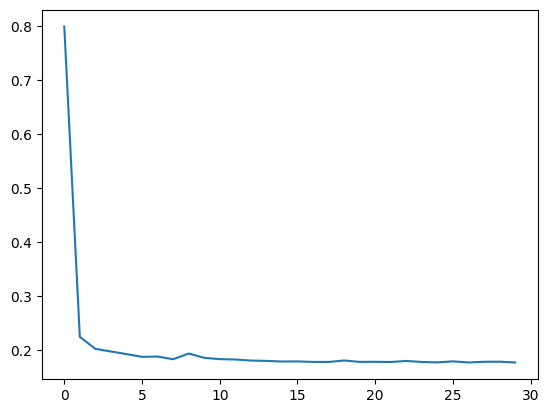

In [ ]:
# plot losses
plt.plot(clf.history['loss'])

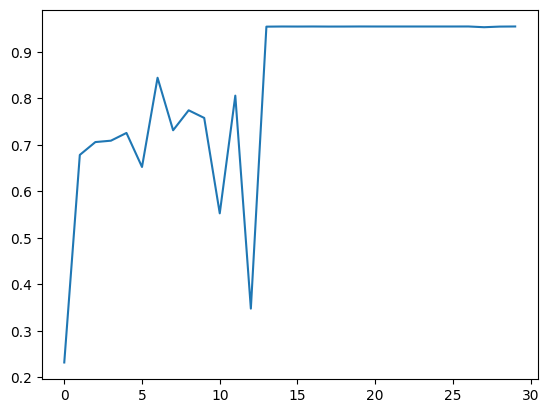

In [ ]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])

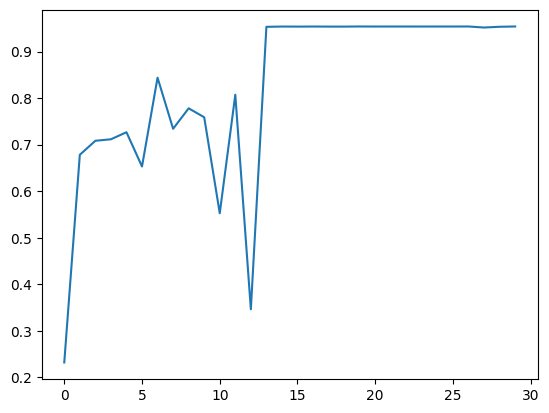

In [ ]:
plt.plot(clf.history['valid_accuracy'])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
preds_mapper = { idx : class_name for idx, class_name in enumerate(clf.classes_)}

preds = clf.predict_proba(X_test)

y_pred = np.vectorize(preds_mapper.get)(np.argmax(preds, axis=1))

test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
test_pre = precision_score(y_pred=y_pred, y_true=y_test, average='weighted')
test_rec = recall_score(y_pred=y_pred, y_true=y_test, average='weighted')

print(f"BEST VALID SCORE FOR gas dataset : {clf.best_cost}")
print(f"FINAL TEST SCORE FOR gas dataset : {test_acc}")
print(f"precision score : {test_pre}")
print(f"recall score : {test_rec}")

BEST VALID SCORE FOR gas dataset : 0.9537724180581324
FINAL TEST SCORE FOR gas dataset : 0.9528963100391672
precision score : 0.9256090022186643
recall score : 0.9528963100391672


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# or you can simply use the predict method

y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"FINAL TEST SCORE FOR gas dataset : {test_acc}")

FINAL TEST SCORE FOR gas dataset : 0.9528963100391672


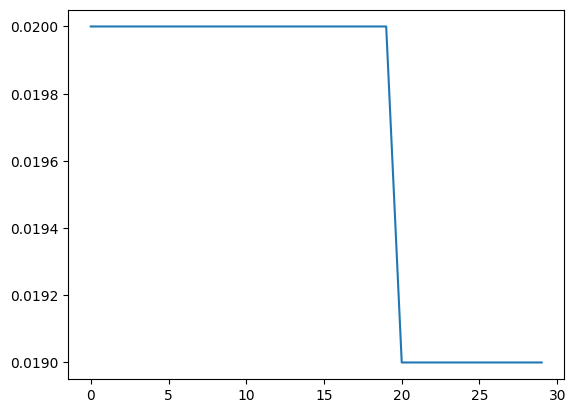

In [ ]:
plt.plot(clf.history['lr'])

In [ ]:
# save state dict
saved_filename = clf.save_model('tabnet_gas_model')

In [ ]:
# define new model and load save parameters
loaded_clf = TabNetClassifier()
loaded_clf.load_model(tabnet_gas_model.zip)

In [ ]:
loaded_preds = loaded_clf.predict_proba(X_test)
loaded_y_pred = np.vectorize(preds_mapper.get)(np.argmax(loaded_preds, axis=1))

loaded_test_acc = accuracy_score(y_pred=loaded_y_pred, y_true=y_test)

print(f"FINAL TEST SCORE FOR gas data : {loaded_test_acc}")

FINAL TEST SCORE FOR gas data : 0.9528963100391672


In [ ]:
assert(test_acc == loaded_test_acc)

In [ ]:
clf.feature_importances_

array([6.09774168e-02, 3.06703713e-03, 0.00000000e+00, 7.06234528e-02,
       2.23372725e-03, 7.47551341e-02, 2.28058926e-02, 7.75178906e-05,
       1.70744870e-01, 3.03993835e-03, 6.98019746e-02, 1.63200873e-02,
       1.46113633e-01, 0.00000000e+00, 1.28187430e-02, 6.16493901e-03,
       3.67539236e-03, 5.62362542e-04, 5.01523621e-02, 1.37279483e-01,
       5.83201552e-02, 6.73386426e-02, 1.78294750e-02, 0.00000000e+00,
       4.29229660e-03, 1.00546644e-03])

In [ ]:
explain_matrix, masks = clf.explain(X_test)

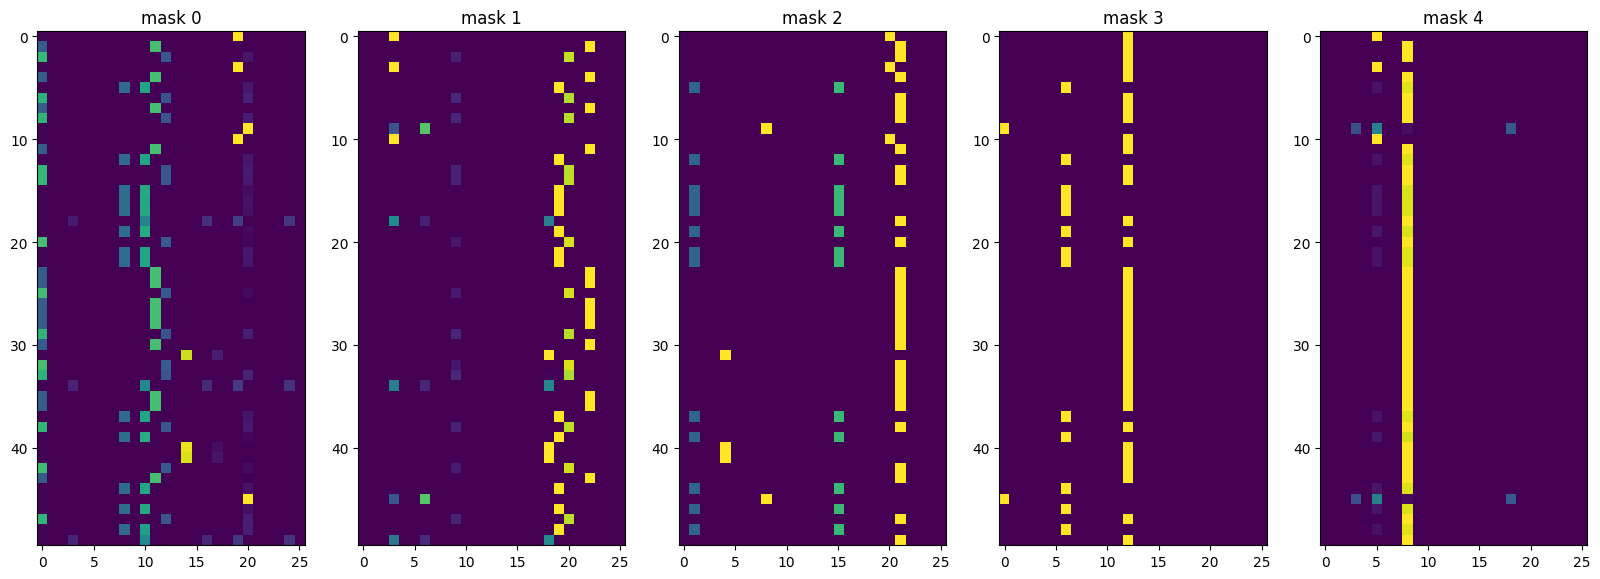

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i in range(5):
  axs[i].imshow(masks[i][:50])
  axs[i].set_title(f"mask {i}")

In [ ]:
from sklearn.metrics import f1_score
test_f1 = f1_score(y_pred=y_pred, y_true=y_test, average='weighted')
print(test_f1)

0.9389803770500416
